In [1]:
import tensorflow as tf

In [2]:

import cv2
import numpy as np
from skimage import io 
from skimage.transform import rotate, AffineTransform, warp
import matplotlib.pyplot as plt
import random
from skimage import img_as_ubyte
import os
from skimage.util import random_noise

In [29]:
image = cv2.imread(r"556.jpg")

In [30]:
image= cv2.cvtColor(image, cv2.COLOR_RGB2BGR)


In [31]:
image

array([[[142, 141, 147],
        [144, 143, 149],
        [145, 144, 150],
        ...,
        [196, 197, 201],
        [194, 195, 199],
        [192, 193, 197]],

       [[143, 142, 148],
        [144, 143, 149],
        [145, 144, 150],
        ...,
        [197, 198, 202],
        [195, 196, 200],
        [193, 194, 198]],

       [[144, 143, 149],
        [144, 143, 149],
        [144, 143, 149],
        ...,
        [196, 197, 201],
        [194, 195, 199],
        [192, 193, 197]],

       ...,

       [[166, 166, 174],
        [166, 166, 174],
        [165, 165, 173],
        ...,
        [207, 208, 210],
        [207, 208, 210],
        [206, 207, 209]],

       [[166, 166, 174],
        [165, 165, 173],
        [165, 165, 173],
        ...,
        [207, 208, 210],
        [207, 208, 210],
        [206, 207, 209]],

       [[166, 166, 174],
        [165, 165, 173],
        [164, 164, 172],
        ...,
        [207, 208, 210],
        [207, 208, 210],
        [206, 207, 209]]

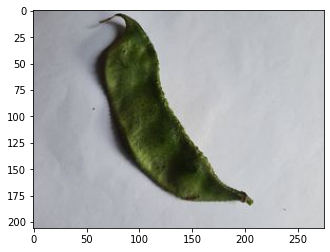

In [32]:
plt.imshow(image)
plt.show()


In [33]:
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

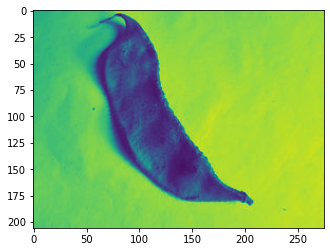

In [34]:
plt.imshow(gray)
plt.show()

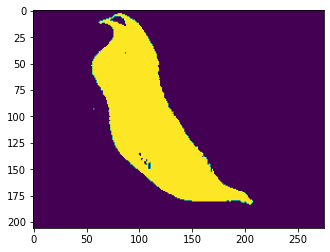

In [35]:
plt.imshow(thresh)
plt.show()

In [36]:
# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)
# sure background area
sure_bg = cv2.dilate(opening,kernel,iterations=3)
# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)
# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)

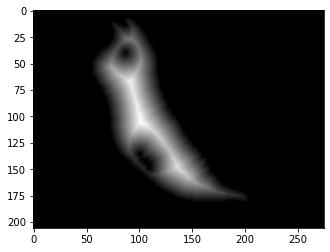

In [37]:
plt.imshow(dist_transform, cmap = 'gray')

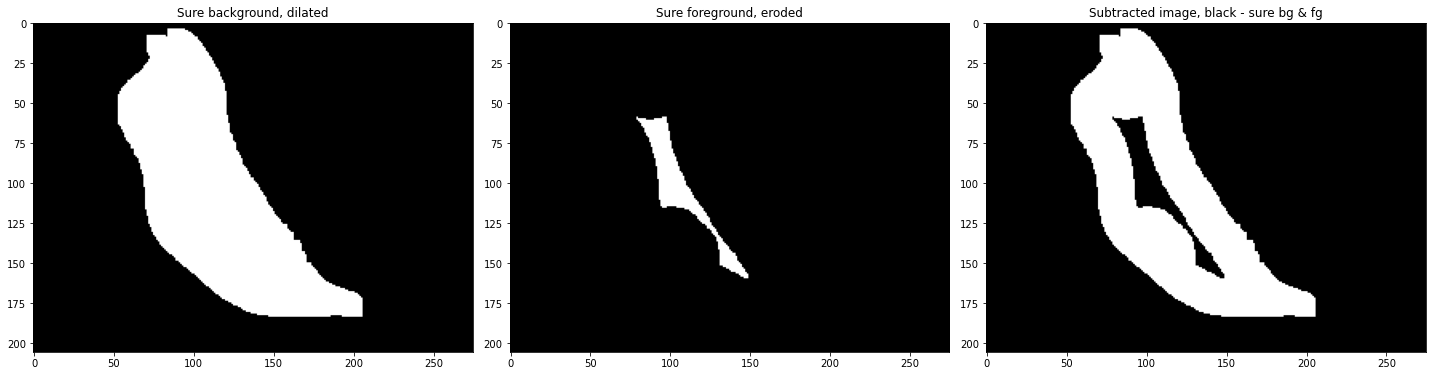

In [38]:
fig = plt.figure(figsize = (20, 10)) # to change figsize
plt.subplot(131)
plt.imshow(sure_bg, cmap = 'gray')
plt.title('Sure background, dilated')

plt.subplot(132)
plt.imshow(sure_fg, cmap = 'gray')
plt.title('Sure foreground, eroded')

plt.subplot(133)
plt.imshow(unknown, cmap = 'gray')
plt.title('Subtracted image, black - sure bg & fg')
plt.tight_layout()

# plt.subplots_adjust(wspace = 3)
# fine tuning 
# f.subplots_adjust(wspace=3)

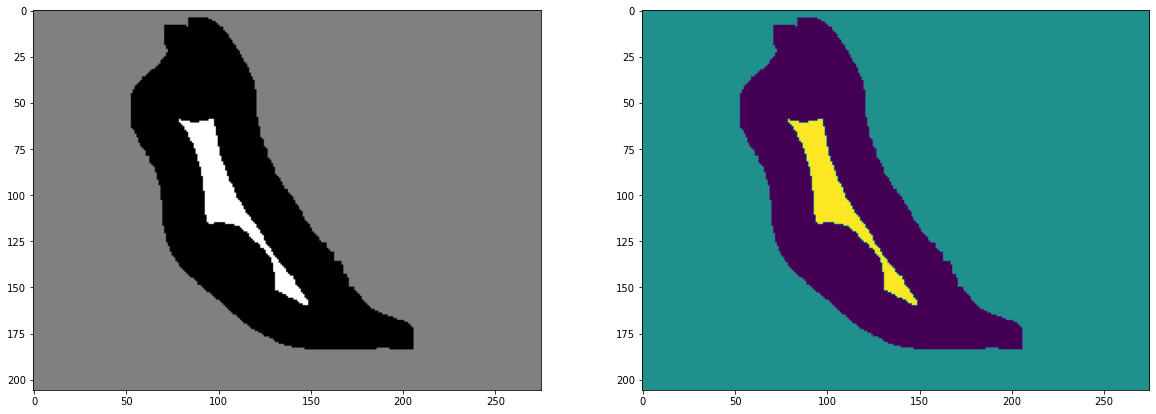

In [39]:
ret, markers = cv2.connectedComponents(sure_fg)

markers = markers + 1

markers[unknown==255] = 0

fig = plt.figure(figsize = (20, 10)) # to change figsize
plt.subplot(121)
plt.imshow(markers, cmap = 'gray')
plt.subplot(122)
plt.imshow(markers)

In [40]:
markers = cv2.watershed(image, markers)
image[markers == -1] = [0, 255,0]

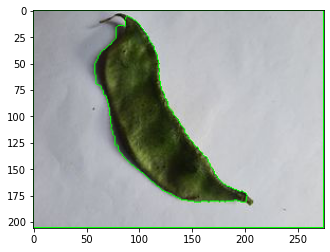

In [41]:
plt.imshow(image)